In [8]:
from python_files.import_libs import *
from python_files.predict import *
%matplotlib inline

In [9]:
results_dict = pickle.load(open("model_scores.p", "rb"))
results_dict.update(pickle.load(open("arima_model_scores.p", "rb")))
restults_df = pd.DataFrame.from_dict(results_dict, orient='index', columns=['RMSE', 'MAE','R2'])
restults_df = restults_df.sort_values(by='RMSE', ascending=False).reset_index()
    
results = restults_df
results

,index,RMSE,MAE,R2
0,LinearRegression,187032.410047,138391.250000,0.581622
1,RandomForest,186173.131784,130940.083333,0.585457
2,XGBoost,184133.838070,132256.750000,0.594489
3,ARIMA,14305.679248,10401.782102,0.984970


C:\Users\mathe\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\mathe\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


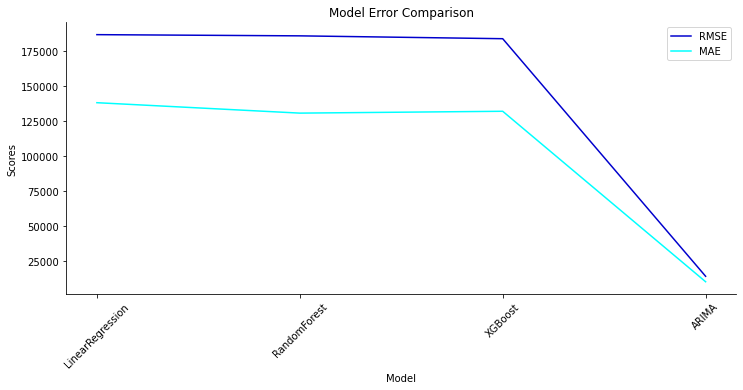

In [10]:
# Plot results
fig, ax = plt.subplots(figsize=(12, 5))
sns.lineplot(np.arange(len(results)), 'RMSE', data=results, ax=ax, label='RMSE', color='mediumblue')
sns.lineplot(np.arange(len(results)), 'MAE', data=results, ax=ax, label='MAE', color='Cyan')
    
plt.xticks(np.arange(len(results)),rotation=45)
ax.set_xticklabels(results['index'])
ax.set(xlabel = "Model",
       ylabel = "Scores",
       title = "Model Error Comparison")
sns.despine()
    
plt.savefig(f'model_output/compare_models.png')

In [11]:
average_monthly_sales = 894478 #see eda notebook
gboost = 11649.666667
percentage_off = round(gboost/average_monthly_sales*100, 2)

print(f"With XGBoost, prediction is within {percentage_off}% of the actual.")

With XGBoost, prediction is within 1.3% of the actual.
